In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os

sys.path.append('/home/user/deep-learning/')
sys.path.append('/home/gbaasch/projects/def-revins/gbaasch/deep-learning')
sys.path.append('../../methods')

In [3]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
from fastai.metrics import root_mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd

from BlackBoxMethod import ResNet, BasicBlock, RNNRegression
from BuildingDataset import BuildingDataset, DataBunch, get_dls

from training.exp.learner import Learner
from training.exp.runner import prep_run_vanilla, prep_one_cycle
# from datahandlers.exp.basic_databunch import DataBunch, get_dls

# Params for papermill

In [4]:
# this cell is tagged `parameters`
label_idx   = 5 
network     = 'cnn'
run_count   = 1
train_fname = '../../hdf5/train.hdf5'
valid_fname  = '../../hdf5/test.hdf5'

In [5]:
# Parameters
network = "rnn"
label_idx = 0
train_fname = "../../hdf5/train.hdf5"
valid_fname = "../../hdf5/test.hdf5"


In [6]:
save_name = str(label_idx) + '_' + network + '_' + str(run_count)

In [7]:
label_idx, network, run_count, save_name

(0, 'rnn', 1, '0_rnn_1')

# Prep Data

In [8]:
# train_fname, valid_fname = 'train.hdf5', 'test.hdf5'
batch_size = 100

train_ds = BuildingDataset(train_fname, label_idx)
valid_ds = BuildingDataset(valid_fname, label_idx)

len(train_ds), len(valid_ds)

data = DataBunch(*get_dls(train_ds, valid_ds, batch_size))
data.train_ds[0][0].shape

torch.Size([2000, 4])

# Train

In [9]:
use_gpu = True

def run_model(model, opt, db, lr=0.01, epochs=10):
    # prepare basic training
    loss = F.mse_loss
    metrics = [root_mean_squared_error]
    learner = Learner(model, opt, db, loss, use_gpu=use_gpu)
    # run training loop
    run = prep_run_vanilla(metrics, use_cuda=use_gpu)
    run.fit(epochs, learner)
    run.recorder.plot_loss()
    return learner

def run_model_one_cycle(model, opt, db, epochs=10):
    # prepare basic training
    loss = F.mse_loss
    metrics = [root_mean_squared_error]
    learner = Learner(model, opt, db, loss, use_gpu=use_gpu)
    # run training loop
    run = prep_one_cycle(use_cuda=use_gpu, metrics=metrics, min_lr=0.00001, max_lr=0.001)
    run.fit(epochs, learner)
    run.recorder.plot_loss()
    return learner

In [10]:
def resnet(ni, **kwargs):
    model = ResNet(ni, BasicBlock, [3, 4, 6, 3, 3], **kwargs)
    return model

In [11]:
if network == 'cnn':
    model = resnet(ni=4, num_classes=1)
    
elif network == 'rnn':
    model = RNNRegression(ni=4)
    
opt = torch.optim.Adam(model.parameters())

epoch      train loss          valid loss     root_mean_squared_error
0          2426.9705           2401.6653              49.0        


1          2423.7459            2399.049            48.9741       


2          2420.7357           2402.6446            49.0109       


3           2416.961           2383.6074            48.8168       


4          2412.4548           2337.7288            48.3398       


5          2408.2603           2261.3295            47.5388       


6          2403.4618           2392.4146            48.9032       


7          2397.7326           2419.6227            49.1732       


8          2389.1969           2341.9355            48.3777       


9          2376.6854           2176.0563            46.6201       


10         2358.1399           2813.6134             53.013       


11         2329.9721           2256.3548            47.4822       


12         2288.4064           2323.4863            48.1885       


13         2230.4459           2177.4979            46.6486       


14         2151.5942           2275.8062            47.6969       


15         2048.8771           2047.6441            45.2421       


16         1918.6378           1865.6259            43.1805       


17         1760.3311           1778.4426            42.1544       


18         1574.8899            1539.439            39.2217       


19         1364.6942            882.9204             29.654       


20         1137.5443            1066.669            32.5982       


21          903.4851            818.9186             28.56        


22          678.2694            595.8379            24.3923       


23          474.4744            327.9992            18.0641       


24          306.1128            282.9186            16.8047       


25          179.8622            148.4218            12.0596       


26          98.2681             72.9121              8.4588       


27          52.0623             68.7314              8.0452       


28          29.8437             125.0291            10.4097       


29          23.2893             19.7584              4.2939       


30          19.2502             21.9974              4.5947       


31          18.3031             23.1579              4.731        


32          17.9253             15.7634              3.8303       


33          17.1743             17.1951              4.0124       


34          16.8795             18.1929              4.0703       


35          17.1067             28.3828              5.2089       


36          16.5622             16.5249              3.8942       


37           16.812             18.3488              4.2094       


38          16.2882             30.6102              5.3837       


39          14.9027             19.3444              4.3326       


40          14.7172             14.8731              3.7724       


41          12.4935             14.6798              3.6505       


42          12.4767             11.4856              3.2889       


43          12.0472              22.637              4.5533       


44          11.4983             18.5727              4.0733       


45          11.0055             13.2371              3.5138       


46          10.7769             12.2538              3.4105       


47          11.2114             29.7285              5.1956       


48          10.4981             11.2613              3.2157       


49          10.3046              13.477              3.5786       


50           10.066              9.9285              3.1057       


51           9.1268             24.9655              4.5813       


52           9.3312             16.7122              3.7176       


53           9.2353              14.171              3.6378       


54           9.4868             30.4959              5.0498       


55           9.9627             14.0623              3.6311       


56           8.8674             17.8269              3.8666       


57           8.7493             28.8859              4.9948       


58           8.4688             11.1314              3.2821       


59           8.2741             10.6836              3.1071       


60           7.9667             111.7704             8.388        


61           8.6342              9.6314              2.9814       


62           7.9735             19.5173              4.3362       


63           7.9429             17.4442              3.7146       


64           7.7883              13.84               3.6057       


65           7.765              11.6577              3.2399       


66           7.9308             14.1288              3.4951       


67           7.5787             28.0746              4.6804       


68           7.775              10.8416              3.1959       


69           7.5131             13.5643               3.42        


70           8.0885             13.0252              3.3007       


71           7.278              11.9846              3.3246       


72           7.0027              9.461               2.8475       


73           6.9399              8.207               2.6837       


74           7.1654             12.3703              3.2677       


75           6.7009             15.3799              3.6807       


76           6.9998             10.6825              3.0137       


77           6.6995             10.6911              3.1093       


78           6.6569              7.9071              2.5729       


79           6.3172              17.912              4.071        


80           6.2238             13.3576              3.2567       


81           6.1269             11.4097              3.2051       


82           6.5184              9.3933              3.0145       


83           6.179               7.1088              2.5269       


84           6.2009              7.5298              2.6389       


85           5.7484             17.4876              3.9904       


86           6.3101              7.5915              2.6202       


87           5.9981             15.2629              3.5798       


88           6.1919              9.6535              3.0391       


89           5.8127             10.8739              3.0553       


90           5.7977              7.8172              2.6577       


91           5.8118              7.8706              2.498        


92           5.6217              8.2058              2.6896       


93           5.8165              8.2504              2.622        


94           5.5654              5.7301              2.2725       


95           5.2855              5.4267              2.129        


96           5.3485              7.1075              2.4866       


97           5.034               6.4339              2.433        


98           5.3171             12.2269              3.2232       


99           5.5915             12.7389              3.5016       


100          5.5266              7.1181              2.4462       


101          5.1598              6.7596              2.4653       


102          5.0194              7.7732              2.6523       


103          4.9303             11.2742              2.9206       


104          5.0473              9.3754              2.7427       


105          4.9418             10.6597              3.0939       


106          4.9113             18.4512              3.909        


107          4.9106             17.8505              3.9333       


108          4.6889              6.8948              2.5713       


109          4.6375             10.1293              3.0145       


110          4.9627              8.5336              2.7798       


111          4.5785              9.0598              2.6706       


112          4.7145              6.1476               2.38        


113          4.6612             31.5918              4.6659       


114          4.4511              6.392               2.4449       


115          4.3539              4.0924              1.888        


116          4.5445              5.0401              2.1508       


117          4.4797              4.6411              2.0625       


118          4.2653              7.7063              2.4342       


119          4.6692             118.8663             7.2575       


120          4.7834             13.2585              3.1826       


121          4.2068              4.6209              1.9809       


122          4.0909              9.9165              2.9849       


123          4.1267              4.9854              2.1319       


124          4.2336              8.3838              2.7786       


125          4.3408              7.2428              2.5107       


126          4.3821              6.0876              2.2906       


127          4.0621              5.2166              2.0714       


128           4.21               4.7575              2.0581       


129          4.2141             13.7446              3.1495       


130          3.9189              5.0614              2.1291       


131          3.7755              6.0674              2.202        


132          4.2294              8.8187              2.6921       


133          3.5741             13.2293              3.1815       


134          4.1604              5.0752              2.1223       


135          3.5191              4.0062              1.9202       


136          3.4704              5.0142              2.1774       


137          3.1966              4.1156              1.8692       


138          3.3263              3.8975              1.8475       


139          3.3694              4.5451              2.0725       


140          3.1423             10.5678              2.9929       


141          3.1442              5.0288              1.9998       


142          3.1893              3.3183              1.7153       


143          2.8092              3.7904              1.9321       


144          3.0587              4.0449              1.8359       


145          3.3523              3.4519              1.7507       


146          2.7968              3.5347              1.8092       


147          2.6683              5.0039              2.0459       


148          2.6616              3.5386              1.7754       


149          2.5567              4.9344              2.0297       


150          2.5006              2.7349              1.5711       


151          2.5742              2.5517              1.521        


152          2.7079              2.195               1.4159       


153          2.3751              6.1766              2.2923       


154          2.4456              2.7537              1.5543       


155          2.3352              2.7851              1.5923       


156          2.2865              2.3443              1.4479       


157          2.3315              3.1192              1.6696       


158          2.329               2.969               1.5624       


159          2.3031              2.484               1.4713       


160          2.2464              6.9981              2.3516       


161          2.0685              2.9309              1.5977       


162          2.1503              2.7785              1.5365       


163          2.1035              2.055               1.3717       


164          2.0732              2.2281              1.4229       


165          2.0502              2.0705              1.3658       


166          2.1398              1.9642              1.3315       


167          2.0613              2.1467              1.405        


168          2.0599              4.0085              1.8277       


169          2.094               2.2434              1.4159       


170          1.9938              2.9516              1.6125       


171          2.1583              4.7498              1.9732       


172          1.9574              1.9078              1.3302       


173          1.9849              2.0335              1.3482       


174          1.8958              1.7144              1.2576       


175          1.9044              1.8045              1.2922       


176          1.8083              1.908               1.3284       


177          1.935               1.6633              1.2333       


178          1.825               3.2045              1.6952       


179          1.8711              1.7209              1.2553       


180          1.837               1.8306              1.3009       


181          1.8711              1.7623              1.2806       


182          1.8067              1.8548              1.2988       


183          1.8163              1.701               1.2471       


184          1.7521              1.6964              1.2542       


185          1.7498              1.6857              1.2451       


186          1.6972              1.7186              1.2667       


187          1.8146              1.8895              1.3195       


188          1.782               1.8586              1.3177       


189          1.7836              1.7581              1.2693       


190          1.7073              1.6274              1.221        


191          1.715               1.6707              1.2399       


192          1.7464              1.6141              1.2179       


193          1.712               1.6191              1.2241       


194          1.7365              1.6327              1.2296       


195          1.7351              1.6157              1.2232       


196          1.6923              1.6185              1.2217       


197          1.7013              1.6116              1.2183       


198          1.707               1.8352              1.3076       


199          1.703               1.716               1.259        


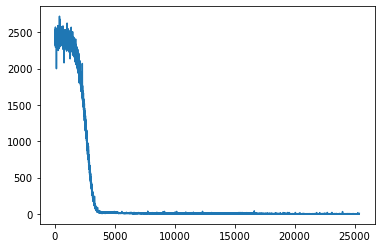

In [12]:
learner = run_model_one_cycle(model, opt, data, epochs=200)

# Predict

In [13]:
# mpath = f'models/cnn_inf' 
mpath = os.path.join('models', save_name)

In [14]:
torch.save(model.state_dict(), mpath) 

In [15]:
state = torch.load(mpath)
if network == 'cnn':
    m = resnet(ni=4, num_classes=1)
    
elif network == 'rnn':
    m = RNNRegression(ni=4)

ml = m.cuda()
ml.load_state_dict(state)
ml.eval();

In [16]:
del model
torch.cuda.empty_cache()

In [17]:
valid_preds = ml(data.valid_dl.x.cuda()) 

### Predict Train

In [18]:
# plt.scatter(data.train_dl.y, train_preds.tolist());
# plt.plot(data.train_dl.y, data.train_dl.y);
# plt.grid()

### Predict Valid

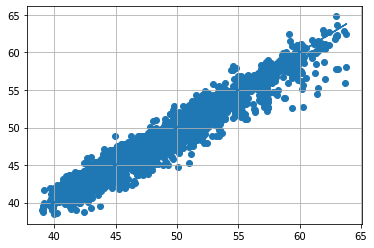

In [19]:
plt.scatter(data.valid_dl.y, valid_preds.tolist());
plt.plot(data.valid_dl.y, data.valid_dl.y);
plt.grid()

# Predict each case

In [20]:
cases_no_infiltration = [
    ('victoria', 'control_concrete', 'False'),
    ('victoria', 'control_concrete', 'True'),
    ('victoria', 'control_wood', 'False'),
    ('victoria', 'control_wood', 'True'),
    ('chicago', 'control_concrete', 'False'),
    ('chicago', 'control_concrete', 'True'),
    ('chicago', 'control_wood', 'False'),
    ('chicago', 'control_wood', 'True'),
    ('victoria', 'control_concrete_inf', 'False'),
    ('victoria', 'control_concrete_inf', 'True'),
    ('victoria', 'control_wood_inf', 'False'),
    ('victoria', 'control_wood_inf', 'True'),
    ('chicago', 'control_concrete_inf', 'False'),
    ('chicago', 'control_concrete_inf', 'True'),
    ('chicago', 'control_wood_inf', 'False'),
    ('chicago', 'control_wood_inf', 'True')
]

In [21]:
def case_string(case):
    case_name = ''
    for c in case:
        case_name += c #+ '\n'
    return case_name

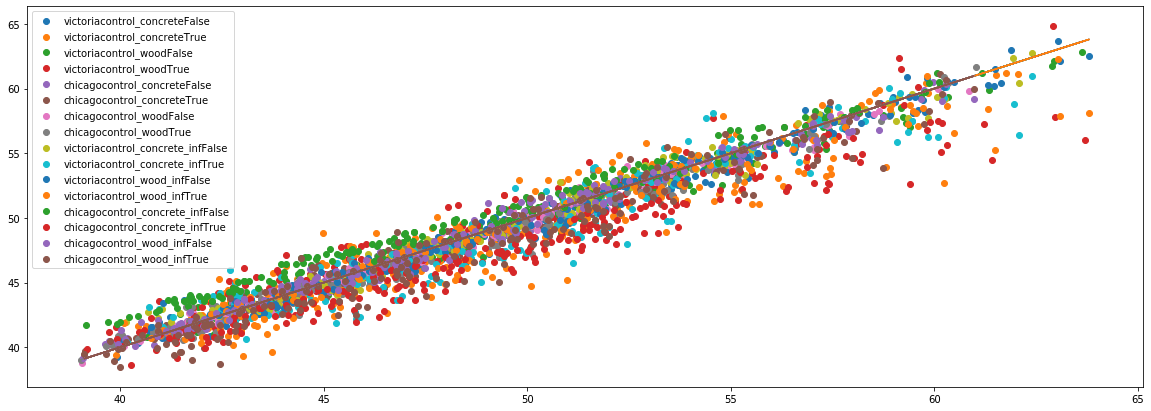

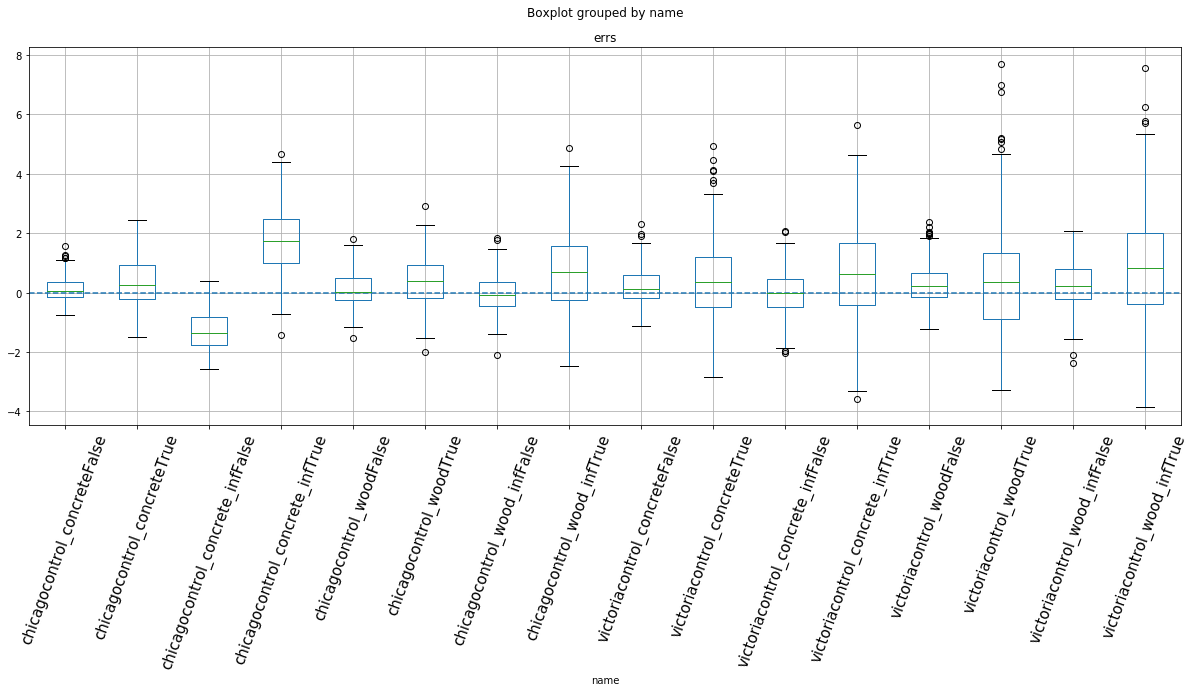

In [22]:
df_errs_all = pd.DataFrame()

plt.figure(figsize=(20,7))

for case in cases_no_infiltration:
    x, y = data.valid_dl.get_by_metadata(list(case))
    preds = ml(x.cuda()) 
    case_name = case_string(case)
    plt.scatter(y, preds.tolist(), label=case_name);
    plt.plot(y, y);
    plt.grid()
#     plt.show()
    df_errors = pd.DataFrame()
    df_errors['errs'] = y.sub(preds.to("cpu")).tolist()
    df_errors['name'] = case_name
    df_errs_all = df_errs_all.append(df_errors)
plt.legend()
plt.show()  

df_errs_all.boxplot(column='errs', by='name', figsize=(20, 7))
plt.axhline(0, 0, 1, label='No Error', linestyle='--')
plt.xticks(rotation=70, fontsize=15);